# Assignment 1: Home Credit Default Risk

In this assignment you will be solving a real world problem on Kaggle. Kaggle is an online community of data scientists and machine learners. There are alot of machine learning competitions on the site (kaggle.com) to help companies, organizations to solve their problems, also help machine learner to learn from real world examples.
We will use the Home Credit Default Risk (https://www.kaggle.com/c/home-credit-default-risk/overview) competition to help Home Credit company predict their clients' repayment abilities. You are going to use all the classification algorithms you have learned and implement them using scikit-learn to predict wether a loan client can repay the loan money. You will also submit your result to Kaggle.
<br>
All classification algorithms you will implement:
<br>
Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>
LinearSVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
<br>
Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html
<br>
Feed forward neural network: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
<br>
Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>
Gradient Boosting: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
<br>
Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
<br>
In this assignment you will be doing the following:
- Understand the credit default risk problem and the data
- Pre-process the data for different algorithms
- Train baseline classifiers
- Check the baseline classifiers by submitting to Kaggle
- Analyzing the baseline results
- Fine tune to improve the baseline classifiers
- Submit fine-tuned results to Kaggle
- Analyzing the fine-tuned results
- Improve the classifiers using cross validation
- Submit cross validation results to Kaggle
- Analyzing the cross validation results

## Loading the data

You can see the data from the competition contains many files but for this assignment we only use the application_train|test.csv files. We have done some pre-processing for you like handlingn date features, one-hot encoding categorical features. Let's load the pre-processed data. If you are interested in the pre-processing code, there is a very details jupyter notebook on the competition's fourm, you can check it out here https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

### Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pickle

with open('data/home_credit_data.pickle', 'rb') as f:
# with open('/content/drive/My Drive/funix/machine-learning/asmnt/MLP303/MLP303x_asm1_anhlvse00534x@funix.edu.vn/assigment/data/home_credit_data.pickle', 'rb') as f:
    train_X, train_y, test_X, test_id_df = pickle.load(f)

feature_names = list(train_X.columns)
print ('train_X shape: {}'.format(train_X.shape))
print ('train_y shape: {}'.format(train_y.shape))
print ('test_X shape: {}'.format(test_X.shape))
print ('feature_names: ', feature_names)

# you should
# train_X shape: (307511, 240)
# train_y shape: (307511,)
# test_X shape: (48744, 240)
# feature_names: long array of string

train_X shape: (307511, 240)
train_y shape: (307511,)
test_X shape: (48744, 240)
feature_names:  ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',

### Count 0 and 1 samples

In [ ]:
y_0_count = (train_y == 0).sum()
y_1_count = (train_y == 1).sum()
total = train_y.shape[0]

print ('y == 0 count: {}, percentage: {} %'.format(y_0_count, y_0_count/total*100))
print ('y == 1 count: {}, percentage: {} %'.format(y_1_count, y_1_count/total*100))

# you should get
# y == 0 count: 282686, percentage: 91.92711805431351 %
# y == 1 count: 24825, percentage: 8.072881945686495 %

y == 0 count: 282686, percentage: 91.92711805431351 %
y == 1 count: 24825, percentage: 8.072881945686495 %


As you can see the **feature_names** is the array of string that includes names of the features on **train_X** and **test_X**.
<br>
**train_X** is a pandas DataFrame contains loan of 307511 clients's informations and it has 240 features.
<br>
**train_y** is a pandas array contains only 0s and 1s which indicating 0: the loan was repaid or 1: the loan was not repaid for each client in the **train_X**.
<br>
**test_id_df** is a pandas DataFrame contain only one colum `SK_ID_CURR` which is the clients's ids to help you submit your results to kaggle later.
<br>
You also notice that the **train_X** is a imbalanced dataset. Only 24825 out of 307511 clients (8%) who is labeled as not repaid.
For that reason, in practice we usually don't use accuracy for measuring classifers's performances. Here is an example why we don't use accuracy for this problem, let's say you build a classifier which predicts every client is 0 then you should get a 91% accuracy for the **train_X** dataset beacause the percentage of clients who will not repay the loan are very small. 
<br>
In particular, the competition uses ROCAUC ([ Receiver Operating Characteristic Area Under the Curve (ROC AUC, also sometimes called AUROC)](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it)) metric. For now, you don't need to care about the details of the metric yet (we will cover common evaluation metrics in the next module). What you should care is that the higher ROCAUC score is better and the minimum is 0 and maximum is 1.
<br>
You also notice that we don't have the **test_y** labels because you have to sumbit your results to kaggle to check your score.

### Handling missing data and scaling
Let's fill in all the missing features's values with the median of that features. We also scale the data so we can train with different algorithms more effective.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

imputer.fit(train_X)
train_X = imputer.transform(train_X)
test_X = imputer.transform(test_X)

# Standardize features by removing the mean and scaling to unit variance
std_scaler = StandardScaler()
std_scaler.fit(train_X)
train_X_norm = std_scaler.transform(train_X)
test_X_norm = std_scaler.transform(test_X)

# Scale each feature to 0-1
mm_scaler = MinMaxScaler(feature_range = (0, 1))
mm_scaler.fit(train_X)
train_X_mm = mm_scaler.transform(train_X)
test_X_mm = mm_scaler.transform(test_X)

## Implement baseline models
Now let's use what you have learned to create seven classifers using scikit-learn. You should store all your classifers into an array and use a for-loop to iterate through each one of them. For each classifer you will record some informations like train time, train accuracy, train roc_auc_score, test probability predictions for analyzing and improving from the baseline models later.
<br>
<br>
Create seven classifers with order and parameters like following:
<br>
**LogisticRegression:** C=1e-4, solver='lbfgs'
<br>
**SVC:** C=1e-4, max_iter=1000, gamma='auto', probability=True
<br>
**MultinomialNB**: No parameters
<br>
**MLPClassifier:** solver='adam', alpha=1e-3, activation='relu', hidden_layer_sizes=(128, 64)
<br>
**DecisionTreeClassifier:** max_depth=30
<br>
**GradientBoostingClassifier:** n_estimators=100, max_depth=3
<br>
**RandomForestClassifier:** n_estimators=50, max_depth=30
<br>
<br>
While traing you must use the right scaling datasets for the right algorithms:
<br>
Use **train_X_norm**, **test_X_norm** for LogisticRegression, MLPClassifier
<br>
Use **train_X_mm**, **test_X_mm** for MultinomialNB
<br>
Use non-scale datasets for other tree algorithms
<br>
<br>
Fill all the YOUR CODE HERE comments with your code in the following cells:

### Get appropriate data for different algorithms
Complete the **get_train_data** function below to get appropiate datasets for different classifers.

In [3]:
def get_train_data(classifier_name):
    """
    Get appropiate scaling data for different algorithms

    :param classifier_name: The name of the classifer

    :return: X (train set), y (train labels), X_test (test set)
    """
    y = train_y
    if classifier_name in ['Logistic_Regression', 'Neural_Network', 'SVM']:
        # ******** YOUR CODE HERE START ********
        X = train_X_norm
        X_test = test_X_norm
        # ******** YOUR CODE HERE END ********
    elif classifier_name == 'MultinomialNB':
        # ******** YOUR CODE HERE START ********
        X = train_X_mm
        X_test = test_X_mm
        # ******** YOUR CODE HERE END ********
    else:
        # ******** YOUR CODE HERE START ********
        X = train_X
        X_test = test_X
        # ******** YOUR CODE HERE END ********
    return X, y, X_test

### Helper functions

In [4]:
def to_submit_file(file_name, probs):
    """
    A helper function helps generating submit files
    
    :param file_name: submit file name
    :param probs: list of probabilities for test samples
    
    :return: None
    """
    submit = test_id_df.copy()
    submit['TARGET'] = probs
    submit.to_csv(file_name, index = False)
    print ('Done writting submit file: ', file_name)

def plot_bar(title, x_labels, y, y_label):
    """
    A helper function helps plotting bar graphs

    :param title: title of the graph
    :param x_labels: x labels
    :param y: data for each x label
    :param y_labels: label for y-axis

    :return: None
    """
    index = np.arange(len(x_labels))
    plt.bar(index, y)
    plt.ylabel(y_label, fontsize=15)
    plt.xticks(index, x_labels, fontsize=15, rotation=90)
    plt.title(title)
    plt.show()

### Train classifers function
Complete the **train_classifiers** function below. We iterate each classifer and train, calculate accuracy, auc, generate submit file.

In [5]:
from sklearn.metrics import roc_auc_score


def train_classifiers(classifier_names, classifiers, prefix_submit='submits', suffix_submit='baseline'):
    """
    Train an array of classifers

    :param classifier_names: A list of classifer names
    :param classifiers: A list of scikit-learn estimators (classifers)
    :param prefix_submit: For exporting submit files
    :param suffix_submit: For exporting submit files

    :return: None
    """
    train_accuracies = []
    train_roc_auc_scores = []
    train_times = []
    test_prob_predictions = []
    
    for idx, clf in enumerate(classifiers):
        classifier_name = classifier_names[idx]
        
        # ******** YOUR CODE HERE START ********
        # call the get_train_data method
        X, y, X_test = get_train_data(classifier_name)
        # ******** YOUR CODE HERE END ********

        print ('Training for classifier: ', classifier_name)
        start_time = time.time()
        # ******** YOUR CODE HERE START ********
        # call fit method of the classifer
        classifier = classifiers[idx].fit(X, y)
        # ******** YOUR CODE HERE END ********
        train_time = time.time() - start_time
        print ('Done training for classifer: ', classifier_name)
        
        # ******** YOUR CODE HERE START ********
        # calculate metrics
        # test_probs is the probabilites for label 1 for X_test
        train_accuracy = classifier.score(X, y)
        train_probs = classifier.predict_proba(X)
        train_roc_auc = roc_auc_score(y, train_probs[:, 1])
        test_probs = classifier.predict_proba(X_test)[:, 1]
        # ******** YOUR CODE HERE END ********

        print('Train time: {} seconds'.format(train_time))
        print ('Train accuracy: ', train_accuracy)
        print ('Train roc auc score: ', train_roc_auc)
        print ('*****************************')

        train_accuracies.append(train_accuracy)
        train_roc_auc_scores.append(train_roc_auc)
        train_times.append(train_time)
        test_prob_predictions.append(test_probs)
        
    for idx, classifier_name in enumerate(classifier_names):
        to_submit_file(
            "{}/{}_{}.csv".format(prefix_submit, classifier_name, suffix_submit),
            test_prob_predictions[idx]
        )

    plot_bar('Train accuracies', classifier_names, train_accuracies, 'Train accuracy')
    plot_bar('Train roc_auc scores', classifier_names, train_roc_auc_scores, 'Train roc_auc')
    plot_bar('Train times', classifier_names, train_times, 'Train time')

### Create and train classifers
Complete the cell below by following the comments. You need to create seven classifers and use the **train_classifiers** function to train them. Some classifiers might take quite a long time to train like **SVC**, **Neural Network**, **Gradient Boosting** (around 20 minutes in a core 7 8th MSI laptop).

Training for classifier:  Logistic_Regression
Done training for classifer:  Logistic_Regression
Train time: 3.3716952800750732 seconds
Train accuracy:  0.9192776843755183
Train roc auc score:  0.7450120498869429
*****************************
Training for classifier:  SVM


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Done training for classifer:  SVM
Train time: 2009.847883939743 seconds
Train accuracy:  0.6598007876141017
Train roc auc score:  0.5421828335160825
*****************************
Training for classifier:  MultinomialNB
Done training for classifer:  MultinomialNB
Train time: 0.693519115447998 seconds
Train accuracy:  0.9150599490749924
Train roc auc score:  0.6453068655546197
*****************************
Training for classifier:  Neural_Network


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done training for classifer:  Neural_Network
Train time: 1355.778296470642 seconds
Train accuracy:  0.9581706020272446
Train roc auc score:  0.9531542113145242
*****************************
Training for classifier:  Decision_Tree
Done training for classifer:  Decision_Tree
Train time: 38.00518822669983 seconds
Train accuracy:  0.9817990250755257
Train roc auc score:  0.9754114548213331
*****************************
Training for classifier:  Gradient_Boosting
Done training for classifer:  Gradient_Boosting
Train time: 369.96480345726013 seconds
Train accuracy:  0.9198402658766678
Train roc auc score:  0.7579898536837663
*****************************
Training for classifier:  Random_Forest
Done training for classifer:  Random_Forest
Train time: 81.83924221992493 seconds
Train accuracy:  0.9737440286688931
Train roc auc score:  0.9998546780407107
*****************************
Done writting submit file:  /content/drive/My Drive/funix/machine-learning/asmnt/MLP303/MLP303x_asm1_anhlvse00534x

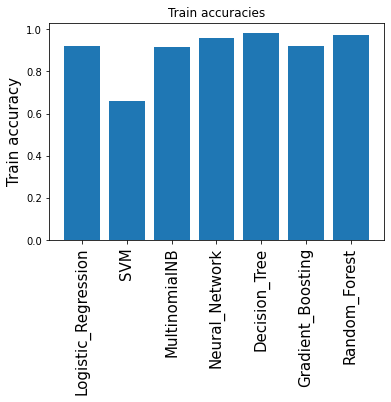

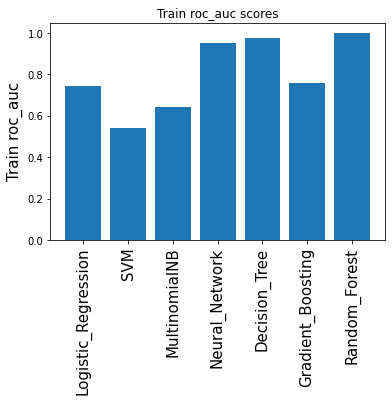

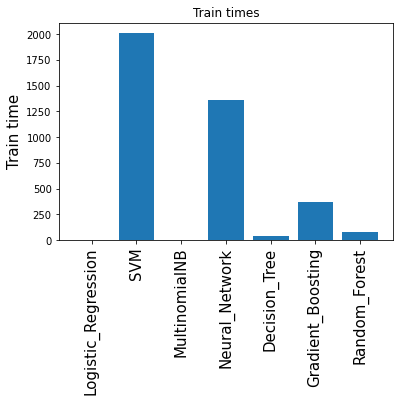

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
#  ******************** YOUR CODE HERE START ********************
"""
Import all sklearn classifers classes here
"""
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
#  ******************** YOUR CODE HERE END ********************

classifier_names = [
    'Logistic_Regression',
    'SVM',
    'MultinomialNB',
    'Neural_Network',
    'Decision_Tree',
    'Gradient_Boosting',
    'Random_Forest',
]
# ******************** YOUR CODE HERE START ********************
"""
Create a list of classifers likes the order in the classifier_names variable
"""
# LogisticRegression: C=1e-4, solver='lbfgs'
# SVC: C=1e-4, max_iter=1000, gamma='auto', probability=True
# MultinomialNB: No parameters
# MLPClassifier: solver='adam', alpha=1e-3, activation='relu', hidden_layer_sizes=(128, 64)
# DecisionTreeClassifier: max_depth=30
# GradientBoostingClassifier: n_estimators=100, max_depth=3
# RandomForestClassifier: n_estimators=50, max_depth=30
classifiers = [
    LogisticRegression(C=1e-4, solver='lbfgs'), # LogisticRegression
    SVC(C=1e-4, max_iter=1000, gamma='auto', probability=True), # SVC
    MultinomialNB(), # MultinomialNB
    MLPClassifier(solver='adam', alpha=1e-3, activation='relu', hidden_layer_sizes=(128, 64)), # MLPClassifier
    DecisionTreeClassifier(max_depth=30), # DecisionTreeClassifier
    GradientBoostingClassifier(n_estimators=100, max_depth=3), # GradientBoostingClassifier
    RandomForestClassifier(n_estimators=50, max_depth=30), # RandomForestClassifier
]

# call the train_classifiers above
# train classifers and generate submit files
train_classifiers(classifier_names, classifiers,
                  prefix_submit="/content/drive/My Drive/funix/machine-learning/asmnt/MLP303/MLP303x_asm1_anhlvse00534x@funix.edu.vn/assigment/submits")

#  ******************** YOUR CODE HERE END ********************

### Submit your results to kaggle
After you have done training classifers, you can see submit files with the format **classifer_baseline.csv** in the **submits** folder. Now, submit all your baseline results to kaggle. Your scores might looks like the image below. Take a screen shot of your results and put it in the folder **images** with the name **student_baseline.png** and re-run the cell. Your private score should be equal or greater than the check scores. You get bonus points for each classifer that has a better private score than the check scores. You do not get any point for classifers that have scores which are **0.02** lower than the check scores.
<br>
**YOUR ANSWER (your image):**
<br>
![title](images/student_baseline.png)
<br>
**CHECK ANSWER:**
<br>
![title](images/baseline.png)

## Analyzing and tuning baseline models
If you implement the baseline models correctly you will notice that **Logistic Regression** and **Gradient Boosting** have the highest score, it is about **0.73**. It is pretty good though, the highest score on the leader board is **0.8** and they did alot of feature engineering though. We will not be focusing on feature engineering though.
<br>
You also notice that **Nerual Network**, **Decision Tree**, **Random Forest** have very high accuracy (98%) and roc_auc (0.98) on the training dataset and very poorly on the test set (0.5, 0.6). They are definitely overfitting the training dataset so we will do some parameter tuing to prevent overfitting for these models.
<br>
Even though **Multinomial Naive Bayes** is weak classifer but they did pretty a reasonable result (0.63).
<br>
**SVM** has a very poorly result only **0.45** roc_auc, you might have noticed that when you were traing the **SVC** classifier from scikit-learn, there is a warning about coverging (ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.). Even thoug we did scale our dataset but the waring still presents. We will try the **LinearSVC** classifier instead of the **SVC** classifier from scikit-learn to see if we can get a better result. By nature **LinearSVC** doesn't ouput probability scores, there is a work around by using the **CalibratedClassifierCV** in scikit-learn to get the Platt scaling, you can check out this discussion [Converting LinearSVC's decision function to probabilities (Scikit learn python )
](https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python). We need the probability ouputs in order to get the auc_oc score when submitting to kaggle.
<br>
<br>
Let's implement new tuned baseline models to see if we can get a better resutls.
Implement the following classifers with new parameters:
<br>
**CalibratedClassifierCV + LinearSVC**: C=1e-2, max_iter=1000, cv=3 (cv is short for cross validation, we use 3 folds here)
<br>
**MLPClassifier**: solver='adam', alpha=1e-1, activation='relu', hidden_layer_sizes=(128) (We increase the regularization effect, and use less complex layers)
<br>
**DecisionTreeClassifier**: max_depth=15 (We decrease the max_depth to decrease overfitting)
<br>
**RandomForestClassifier**: n_estimators=25, max_depth=15 (We decrease the max_depth and number of tree to decrease overfitting)

Training for classifier:  SVM


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done training for classifer:  SVM
Train time: 765.0790803432465 seconds
Train accuracy:  0.9192191498840692
Train roc auc score:  0.749069056077429
*****************************
Training for classifier:  Neural_Network
Done training for classifer:  Neural_Network
Train time: 571.5212128162384 seconds
Train accuracy:  0.9194500359336739
Train roc auc score:  0.7635192592389455
*****************************
Training for classifier:  Decision_Tree
Done training for classifer:  Decision_Tree
Train time: 23.18904399871826 seconds
Train accuracy:  0.9345519347275382
Train roc auc score:  0.7990116666691247
*****************************
Training for classifier:  Random_Forest
Done training for classifer:  Random_Forest
Train time: 26.818793773651123 seconds
Train accuracy:  0.9200809076748474
Train roc auc score:  0.8969843759403704
*****************************
Done writting submit file:  /content/drive/My Drive/funix/machine-learning/asmnt/MLP303/MLP303x_asm1_anhlvse00534x@funix.edu.vn/assi

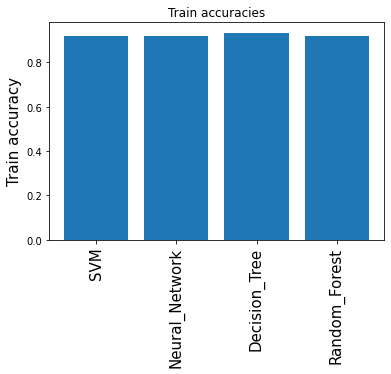

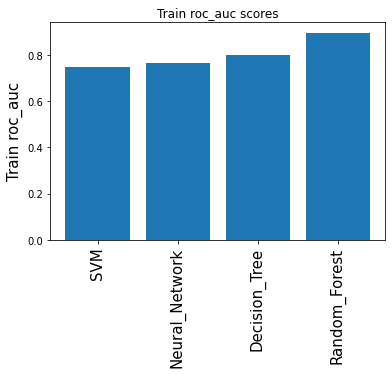

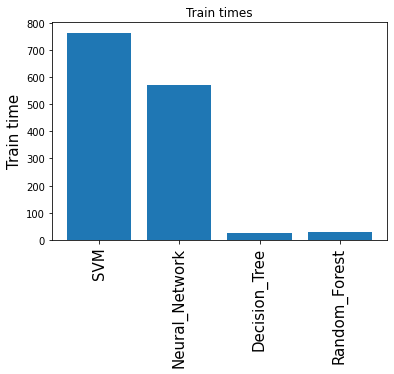

In [ ]:
tuned_classifier_names = [
    'SVM',
    'Neural_Network',
    'Decision_Tree',
    'Random_Forest',
]

# ******************** YOUR CODE HERE START ********************
"""
Create a list of classifers likes the order in tuned_classifier_names variable
"""
# CalibratedClassifierCV + LinearSVC: C=1e-2, max_iter=1000, cv=3 (cv is short for cross validation, we use 3 folds here)
# MLPClassifier: solver='adam', alpha=1e-1, activation='relu', hidden_layer_sizes=(128) (We increase the regularization effect, and use less complex layers)
# DecisionTreeClassifier: max_depth=15 (We decrease the max_depth to decrease overfitting)
# RandomForestClassifier: n_estimators=25, max_depth=15 (We decrease the max_depth and number of tree to decrease overfitting)
tuned_classifiers = [
    CalibratedClassifierCV(LinearSVC(C=1e-2, max_iter=1000), cv=3), # CalibratedClassifierCV
    MLPClassifier(solver='adam', alpha=1e-1, activation='relu', hidden_layer_sizes=(128)), # MLPClassifier
    DecisionTreeClassifier(max_depth=15), # DecisionTreeClassifier
    RandomForestClassifier(n_estimators=25, max_depth=15), # RandomForestClassifier
]
# ******************** YOUR CODE HERE END ********************

# train classifers and generate submit files
train_classifiers(tuned_classifier_names, tuned_classifiers, '/content/drive/My Drive/funix/machine-learning/asmnt/MLP303/MLP303x_asm1_anhlvse00534x@funix.edu.vn/assigment/submits/tuned_baseline', 'tuned_baseline')

### Submit your results to kaggle
Submit your result to kaggle. Your score should look like the image below. Take a screen shot of your results and put it in the folder images with the name **student_tuned_baseline.png**.
<br>
As you can see we got lower scores for the training set but better scores for test set. We encourage you to try more tuning to get better scores. Bonus points for those who can get higher scores.
<br>
**YOUR ANSWER (your image):**
<br>
![title](images/student_tuned_baseline.png)
<br>
**CHECK ANSWER:**
<br>
![title](images/tuned_baseline.png)

## Hyper parameters tuning and  cross validation with GridSearchCV
In the above section you have tried tuning one value for each parameter by creating a new classifer. What if you want to try many diffirent values for diffrent parameters, scikit-learn proves you the [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class which help you to tune parameters much more efffective. The **GridSearchCV** will pick the best combination parameters for the classifers, the **scoring** parameter specifies metric for comparing classifer instances, here we use **accuracy**. You might wonder which dataset is used for scoring the classifers. A common approach is to split the original train dataset into new train and validation datasets and train the model on the new train dataset and scoring the model on the validation set, then we pick the model with the highest score on the validation dataset. You might also ask why don't we just use the test set for finding the best paramaters, the problem with that is that you might end up overfitting the test set, the hole point of training a classifier is to predict unseen data so we only use the test set for the final evaluation. Here we use [k folds cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) method for evaluating classifers when tuning parameters. The purpose of using cross-validation is that when you using train, validation method the model might misses informations from the validation set. There are few common cross-validation method here we use k folds cross-validation. The idea is that we split the train set into k folds (parts) we train the model on k - 1 folds and evaluate the model on 1 folds, we repeatedly do that k times for each k - 1 folds, the average over k folds is the final score. You can specify the number of folds by setting the **cv** parameter when you are creating the **GridSearchCV** instance.
<br>
<br>
Let's use **GridSearchCV** to find good paramters for our baseline models. We have already done cross-validation for **SVM** by using **CalibratedClassifierCV** + **LinearSVC** with **cv=3** in the previous sections and get pretty good results (0.73) so to save our time we only do six other algorithms in this section and focusing on tree-based algorithms beacause they are sensitive to hyper-parameters and they are quit fast to train. For **Neural_Network** it takes quit a long time to train (20 minutes for 1 route cross validation) so could try different values of alpha if you want but in our answer we only consider 1 value for simplification.

Training for classifier:  Logistic_Regression
Done training for classifer:  Logistic_Regression
Train time: 98.1325786113739 seconds
Train accuracy:  0.9192776843755183
Train roc auc score:  0.7450120498869429
*****************************
Training for classifier:  MultinomialNB
Done training for classifer:  MultinomialNB
Train time: 14.384007453918457 seconds
Train accuracy:  0.9150599490749924
Train roc auc score:  0.6453068655546197
*****************************
Training for classifier:  Neural_Network
Done training for classifer:  Neural_Network
Train time: 36607.90539979935 seconds
Train accuracy:  0.9248417129793731
Train roc auc score:  0.8370732994171386
*****************************
Training for classifier:  Decision_Tree
Done training for classifer:  Decision_Tree
Train time: 720.741866350174 seconds
Train accuracy:  0.9192841882079015
Train roc auc score:  0.7124806644252849
*****************************
Training for classifier:  Gradient_Boosting
Done training for classifer

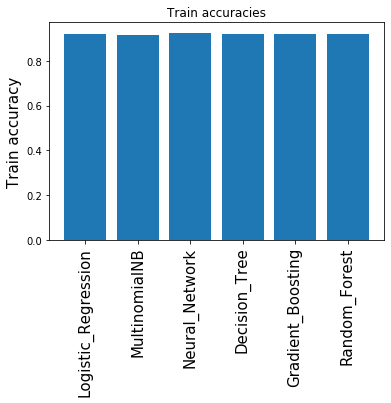

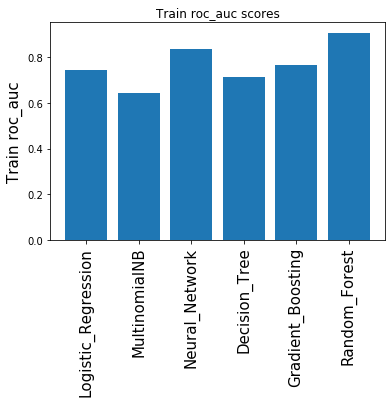

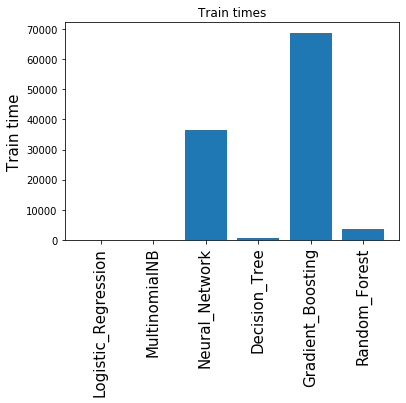

In [7]:
from sklearn.model_selection import GridSearchCV

cv_classifier_names = [
    'Logistic_Regression',
    'MultinomialNB',
    'Neural_Network',
    'Decision_Tree',
    'Gradient_Boosting',
    'Random_Forest',
]

# ******************** YOUR CODE HERE START ********************
"""
Try diffrent hyper parameters for each classifer here
We provide an example for Logistic_Regression
You try with Neural_Network, Decision_Tree, Gradient_Boosting, Random_Forest
For Neural_Network you could try out different values for alpha like 1e-1, 1e-2, ... 
But it might take really long time to train.
For tree-based algorithms try different max_dep likes 5, 10, 20, ... and
different number of n_estimators likes 50, 100, ...
"""
tuning_parameters = [
    {
        'C': [1e-2, 1e-4], # YOUR CODE HERE for Logistic Regression
        'solver': ['lbfgs'],
    },
    {}, # Empty for MultinomialNB
    {
        'alpha': [1e-2] # YOUR CODE HERE for Neural_Network
    },
    {
        'max_depth': [5, 10, 15, 20], # YOUR CODE HERE for Decision_Tree
    },
    {
        'n_estimators': [50, 100], # YOUR CODE HERE for Gradient_Boosting
        'max_depth': [5, 10, 15],
    },
    {
        'n_estimators': [50, 100], # YOUR CODE HERE for Random_Forest
        'max_depth': [5, 10, 15],
    },
]
# ******************** YOUR CODE HERE END ********************

cv_classifiers = [
    LogisticRegression(solver='lbfgs'),
    MultinomialNB(),
    MLPClassifier(solver='adam', activation='relu',
                        hidden_layer_sizes=(128)),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
]

grid_classifiers = []
num_folds = 5

"""
Create GridSearchCV for each classifer in cv_classifiers variable
Use scoring='accuracy', cv=num_folds
"""
for idx, clf in enumerate(cv_classifiers):
    # ******************** YOUR CODE HERE START ********************
    grid_classifiers.append(
        GridSearchCV(clf, param_grid=tuning_parameters[idx],  cv=num_folds)
    )
    # ******************** YOUR CODE HERE END ********************

# train classifers and generate submit files
train_classifiers(cv_classifier_names, grid_classifiers, 'submits/cross_validation', 'cross_validation')
# train_classifiers(cv_classifier_names, grid_classifiers, '/content/drive/My Drive/funix/machine-learning/asmnt/MLP303/MLP303x_asm1_anhlvse00534x@funix.edu.vn/assigment/submits/cross_validation', 'cross_validation')

  ### Submit your results to kaggle
Submit your result to kaggle. Your score should look like the image below. Take a screen shot of your results and put it in the folder images with the name **student_cross_validation.png**.
<br>
As you can see we got lower scores for the training set but better scores for test set. We encourage you to try more tuning to get better scores. Bonus points for those who can get higher scores.
<br>
**YOUR ANSWER (your image):**
<br>
![title](images/student_cross_validation.png)
<br>
**CHECK ANSWER:**
<br>
![title](images/cross_validation.png)

As you can notice that our scores improve a little for **Decision_Tree**, for other algorithms almost is the same. 